# Comparison of LDA, QDA and NB on real data

In [59]:
from implementation.LDA import LDA
from implementation.QDA import QDA
from implementation.NB import NB
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from scipy.io import arff

## Pistachio dataset

Source: https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection?resource=download

In [ ]:
pistachio = pd.read_csv('data/pistachio.csv')
# no nan entries
pistachio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [11]:
pistachio.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [3]:
pistachio['Class'].unique()

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

In [ ]:
X_pistachio = pistachio.drop('Class', axis=1).to_numpy()
y_pistachio = np.where(pistachio['Class'] == 'Kirmizi_Pistachio', 1, 0)

In [ ]:
results_pistachio = {'LDA': [], 'QDA': [], 'NB': []}

for _ in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X_pistachio, y_pistachio, test_size=0.2)

    lda = LDA()
    qda = QDA()
    nb = NB()

    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)
    y_pred_nb = nb.predict(X_test)

    results_pistachio['LDA'].append(accuracy_score(y_test, y_pred_lda))
    results_pistachio['QDA'].append(accuracy_score(y_test, y_pred_qda))
    results_pistachio['NB'].append(accuracy_score(y_test, y_pred_nb))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB on Pistachio dataset')

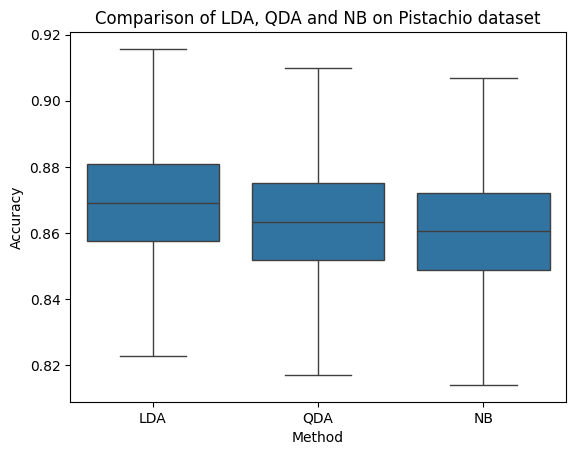

In [7]:
data_pistachio = []
for method in results_pistachio:
    data_pistachio.extend([(method, acc) for acc in results_pistachio[method]])

df_pistachio = pd.DataFrame(data_pistachio, columns=['Method', 'Accuracy'])

sns.boxplot(x='Method', y='Accuracy', data=df_pistachio, showfliers=False).set_title('Comparison of LDA, QDA and NB on Pistachio dataset')

## Apple Quality dataset

Source: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

In [74]:
apple_quality = pd.read_csv('data/apple_quality.csv')
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [75]:
apple_quality.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [76]:
apple_quality = apple_quality.dropna()
apple_quality = apple_quality.drop('A_id', axis=1)

In [77]:
apple_quality['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [78]:
apple_quality['Acidity'].head()

0    -0.491590483
1    -0.722809367
2     2.621636473
3     0.790723217
4     0.501984036
Name: Acidity, dtype: object

In [79]:
apple_quality['Acidity'] = apple_quality['Acidity'].astype(float)

In [80]:
apple_quality['Acidity'].info()

<class 'pandas.core.series.Series'>
Index: 4000 entries, 0 to 3999
Series name: Acidity
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 62.5 KB


In [81]:
X_apple = apple_quality.drop('Quality', axis=1).to_numpy()
y_apple = np.where(apple_quality['Quality'] == 'good', 1, 0)

In [82]:
results_apple = {'LDA': [], 'QDA': [], 'NB': []}

for _ in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X_apple, y_apple, test_size=0.2)

    lda = LDA()
    qda = QDA()
    nb = NB()

    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)
    y_pred_nb = nb.predict(X_test)

    results_apple['LDA'].append(accuracy_score(y_test, y_pred_lda))
    results_apple['QDA'].append(accuracy_score(y_test, y_pred_qda))
    results_apple['NB'].append(accuracy_score(y_test, y_pred_nb))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB on Apple Quality dataset')

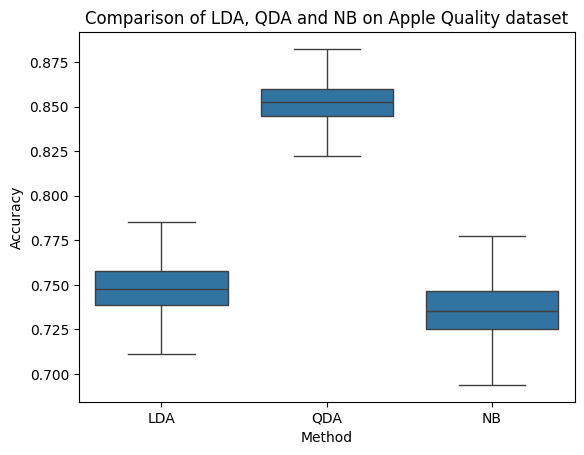

In [83]:
data_apple = []
for method in results_apple:
    data_apple.extend([(method, acc) for acc in results_apple[method]])

df_apple = pd.DataFrame(data_apple, columns=['Method', 'Accuracy'])

sns.boxplot(x='Method', y='Accuracy', data=df_apple, showfliers=False).set_title('Comparison of LDA, QDA and NB on Apple Quality dataset')

## Rice dataset

Source: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [60]:
data, meta = arff.loadarff('data/Rice_Cammeo_Osmancik.arff')
rice = pd.DataFrame(data)
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [63]:
rice.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [64]:
rice['Class'].unique()

array([b'Cammeo', b'Osmancik'], dtype=object)

In [68]:
X_rice = rice.drop('Class', axis=1).to_numpy()
y_rice = np.where(rice['Class'] == b'Cammeo', 1, 0)

In [69]:
results_rice = {'LDA': [], 'QDA': [], 'NB': []}

for _ in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X_rice, y_rice, test_size=0.2)

    lda = LDA()
    qda = QDA()
    nb = NB()

    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)
    y_pred_nb = nb.predict(X_test)

    results_rice['LDA'].append(accuracy_score(y_test, y_pred_lda))
    results_rice['QDA'].append(accuracy_score(y_test, y_pred_qda))
    results_rice['NB'].append(accuracy_score(y_test, y_pred_nb))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB on Rice dataset')

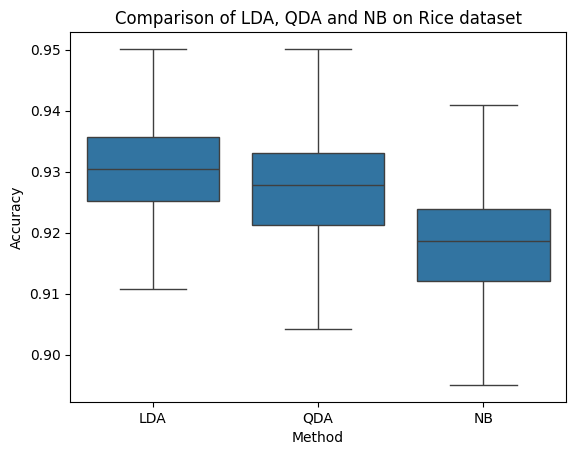

In [70]:
data_rice = []
for method in results_rice:
    data_rice.extend([(method, acc) for acc in results_rice[method]])

df_rice = pd.DataFrame(data_rice, columns=['Method', 'Accuracy'])

sns.boxplot(x='Method', y='Accuracy', data=df_rice, showfliers=False).set_title('Comparison of LDA, QDA and NB on Rice dataset')